[ADS entry](http://adsabs.harvard.edu/abs/1985Natur.317...44C)

In [48]:
import sympy
sympy.init_printing()

Equation 1

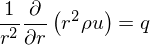

In [49]:
rho = sympy.Symbol('rho') # Density
u = sympy.Symbol('u') # Velocity
r = sympy.Symbol('r', positive=True) # Radius
q = sympy.Symbol('q') # Mass injection rate
eqn_1 = sympy.Eq(sympy.Derivative(rho*u*r**2,r)/r**2,q)
eqn_1

Equation 2

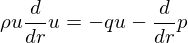

In [50]:
p = sympy.Symbol('p') # Pressure
eqn_2 = sympy.Eq(rho*u*sympy.Derivative(u,r),-sympy.Derivative(p,r)-q*u)
eqn_2

Equation 3

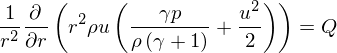

In [51]:
Q = sympy.Symbol('Q', positive=True) # Energy injection rate
gamma = sympy.Symbol('gamma', positive=True) # Adiabatic index
eqn_3 = sympy.Eq(sympy.Derivative(rho*u*r**2*(u**2/2+gamma*p/rho/(gamma+1)),r)/r**2,Q)
eqn_3

Mass conservation can be integrated

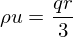

In [52]:
_ = q*r**2
_ = sympy.integrate(_,r)
int_mass_cons = sympy.Eq(rho*u,_/r**2)
int_mass_cons

Energy conservation can be integrated

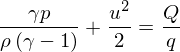

In [67]:
_ = Q*r**2
_ = sympy.integrate(_,r)
_ = _/r**2
_ = _/ int_mass_cons.rhs
int_energy_cons = sympy.Eq(gamma*p/(gamma-1)/rho+u**2/2,_)
int_energy_cons

Solution without injection

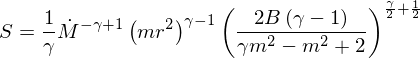

In [176]:
m = sympy.Symbol('m', positive=True) # Mach number
c = sympy.Symbol('c') # Speed of sound
dot_M = sympy.Symbol(r'\dot{M}', positive=True)
B = sympy.Symbol('B',positive=True)
S = sympy.Symbol('S', positive=True)
xi = sympy.Symbol('xi', positive=True)
_ = [sympy.Eq(rho*u*r**2,dot_M),
    sympy.Eq(u**2/2+gamma*p/rho/(gamma-1),B),
    sympy.Eq(p/rho**gamma,S)]
_ = [itm.subs(u,m*c) for itm in _]
_ = [itm.subs(p,rho*c**2/gamma) for itm in _]
_ = [itm.subs(sympy.solve(_[0],rho,dict=True)[0]) for itm in _]
_ = [itm.subs(sympy.solve(_[1],c,dict=True)[1]) for itm in _]
_ = _[2]
_ = sympy.expand_power_base(_,force=True)
_ = _.simplify()
_ = _.subs(m**2,xi**2/(gamma-1)).simplify().subs(xi,m*sympy.sqrt(gamma-1)).simplify()
_ = _.subs(gamma,xi+1).simplify().subs(xi,gamma-1).simplify()
outside_solution = _
outside_solution

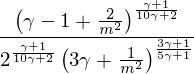

In [155]:
z = sympy.Symbol('z') # Speed of sound squared
n = sympy.Symbol('n', positive=True) # 1/m**2
xi = sympy.Symbol('xi', positive=True) # Auxiliary variable
_ = [int_mass_cons, int_energy_cons, eqn_2]
_ = [itm.subs(p,rho*z/gamma) for itm in _]
_ = [itm.subs(u,m*sympy.sqrt(z)) for itm in _]
_ = [itm.subs(sympy.solve(_[1],z,dict=True)[0]) for itm in _]
_ = [itm.subs(sympy.solve(_[0],rho,dict=True)[0]) for itm in _]
_ = _[2]
_ = _.subs(m,1/sympy.sqrt(n(r)))
_ = _.doit()
_ = sympy.solve(_,n(r).diff(r))[0]
_ = _.subs(n(r),n)
_ = 1/_/r
_ = sympy.integrate(_,n)
_ = sympy.logcombine(_,force=True)
_ = sympy.exp(_)
_ = _.factor(n)
_ = _.subs(n,1/m**2)
inside_solution = _
inside_solution

Both cases ($r<R$ and $r>R$) have singularities at $m = 1$. Hence, the flow in each region is either supersonic or subsonic, and therefore the sonic point must be at $r = R$.

equation 4

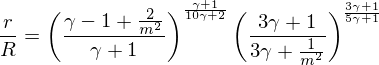

In [189]:
R = sympy.Symbol('R') # Radius of the wind emitting region
_ = inside_solution/inside_solution.subs(m,1)
eqn_4 = sympy.Eq(r/R,sympy.powsimp(_))
eqn_4

Equation 5

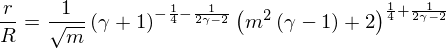

In [183]:
_ = sympy.solve(outside_solution,r)[0]
_ = _/(_.subs(m,1))
_ = sympy.expand_power_base(_,force=True)
_ = _.simplify()
_ = _.subs(gamma,xi+1).simplify().subs(xi,gamma-1)
eqn_5 = sympy.Eq(r/R,_)
eqn_5